### Treść zadania

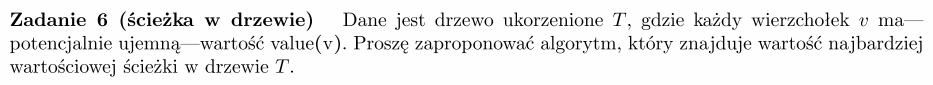

### Omówienie algorytmu

Problem szukania ścieżki o maksymalnej sumie jest nieco podobny do problemu szukania największej sumy spójnego podciągu (algorytm Kedane). W analogiczny sposób do tego algorytmu będziemy resetować wartość sumy tymczasowej (przywracać do 0), gdy zejdzie ona poniżej 0. Jest to równoznaczne z odrzuceniem wcześniejszej ścieżki i rozpoczęciem szukania nowej, począwszy od bieżącego węzła. Idea jest taka, aby przekazywać globalnie najlepszą wartość ścieżki w górę drzewa, przy pomocy rekurencji. Dokładniejszy opis funkcji rekurencyjnej:
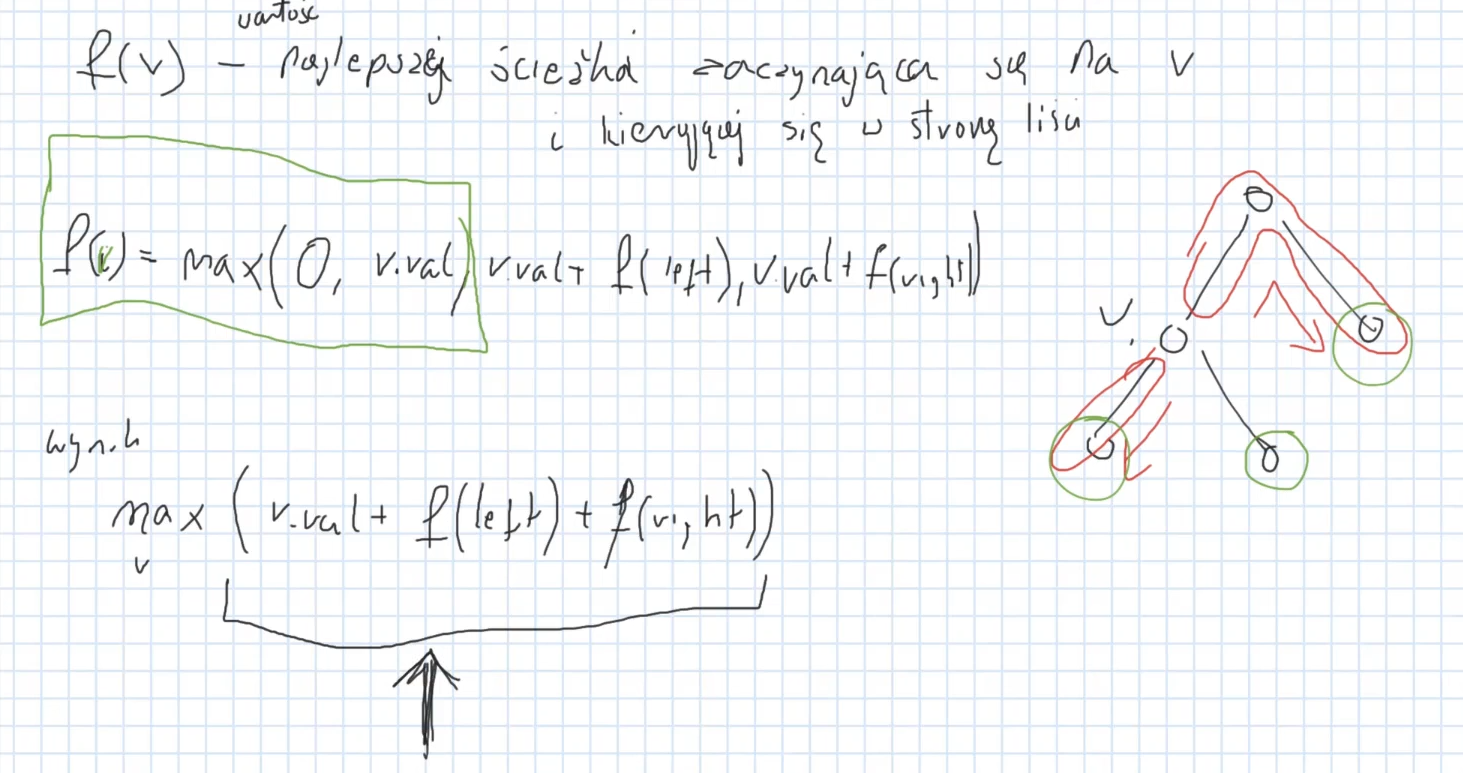

##### Bardzo dobre wyjaśnienie problemu:
LINK: https://www.youtube.com/watch?v=6cA_NDtpyz8

### Złożoność

###### Obliczeniowa:
$ O(n) $ - każdy spośród $ n $ węzłów odwiedzamy dokładnie jeden raz
###### Pamięciowa:
$ O(h) $ - maksymalna liczba zejść rekurencji

### Implementacja #1
#### Dla drzewa binarnego (takie było jako przykład na ćwiczeniach)

##### Przykładowe drzewo do testów

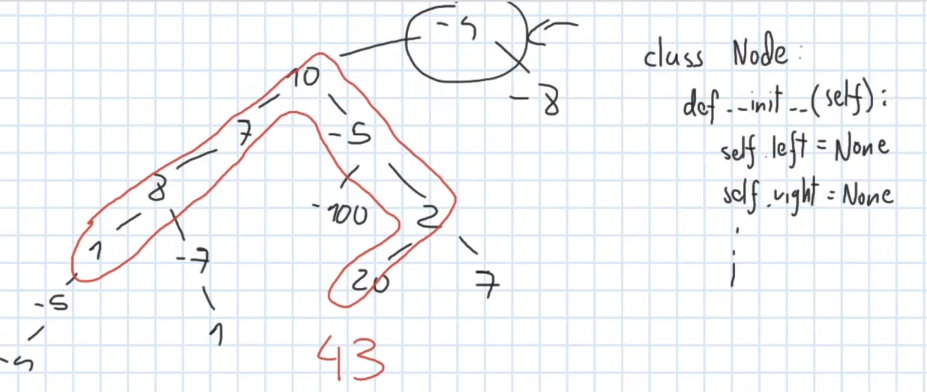

In [1]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right        
        
        
def max_path(root):
    global_max = float('-inf')
    
    def recur(node):
        if not node: return 0
        nonlocal global_max
        
        left_max   = recur(node.left)
        right_max  = recur(node.right)
        global_max = max(global_max, node.val + left_max + right_max)
        # No forks of a path are allowed (as a current path, treat only a path 
        # which is a single line because as a final result we will take only
        # the a path which is a single line)
        curr_max   = max(0, node.val + max(left_max, right_max))
        return curr_max
        
    recur(root)
    
    return global_max

###### Kilka testów

In [2]:
v = Node(5)
u = Node(-2)
w = Node(3)
z = Node(10)

v.left = u
v.right = w
w.left = z

print(max_path(v))

18


In [3]:
root = Node(-4, 
            Node(10,
                Node(7,
                    Node(8,
                        Node(1,
                            Node(-5,
                                Node(-4)
                            )
                        ),
                        Node(-7, 
                            right=Node(1)
                            )
                    )
                ),
                Node(-5,
                     Node(-100),
                     Node(2,
                          Node(20),
                          Node(7)
                         )
                    )
                ),
            Node(-8)
            )

print(max_path(root))

43


### Implementacja #2
#### Dla dowolnego drzewa

##### Przykładowe drzewo do testów

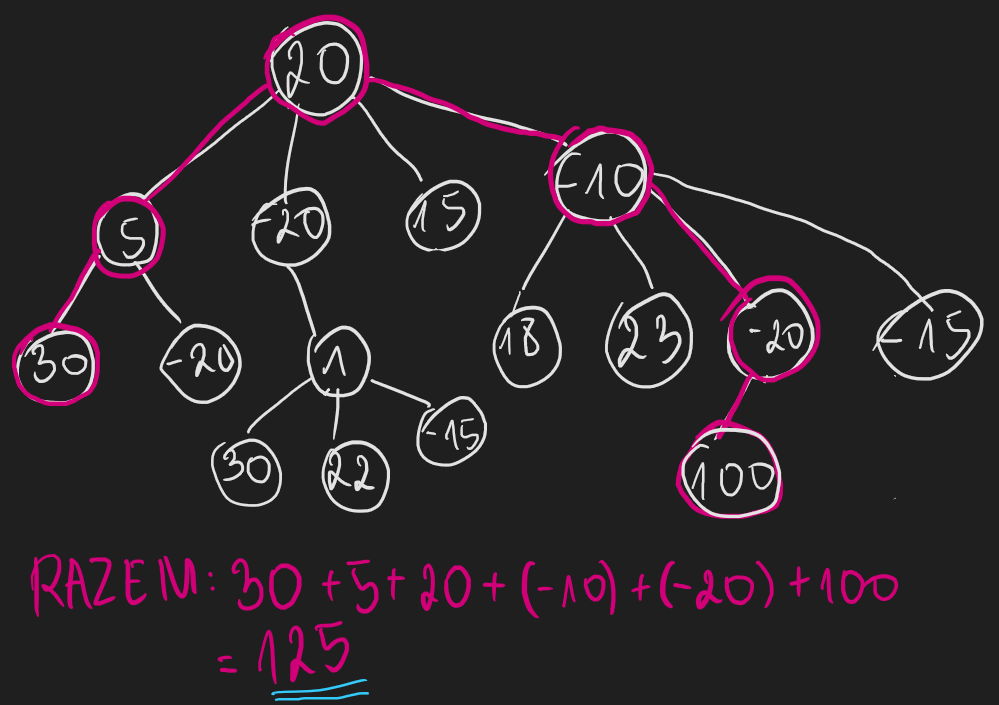

W tym przypadku drzewo może mieć dowolną liczbę węzłów - dzieci, a więc musimy rozważyć wszystkie ścieżki, zaczynające się we wszystkich dzieciach danego węzła. Konieczne jest ponownie wyznaczenie dwóch ścieżek o makdymalnej wartości, wychodzących z danego węzła, bo mogą one tworzyć jedną ścieżkę, której sumaryczna wartość będzie największa, przechodzącą przez bieżący węzeł.

In [4]:
class Node:
    def __init__(self, val, children=[]):
        self.val = val
        self.children = children
        
        
def update_max_paths(max_paths, child_max):
    # Try to replace the lower value at first (we want to
    # maximize a sum of both paths' values so we have to get rid
    # of the lower one at first)
    if max_paths[0] > max_paths[1] and child_max > max_paths[1]:
        max_paths[1] = child_max
    elif child_max > max_paths[0]:
        max_paths[0] = child_max
        
        
def max_path(root):
    global_max = float('-inf')
    
    def recur(node):
        nonlocal global_max
        
        max_paths = [0, 0]
        for child in node.children:
            child_max = recur(child)
            update_max_paths(max_paths, child_max)
        
        global_max = max(global_max, node.val + sum(max_paths))
        # curr_max will be a single line straight path (thet means each next
        # node of a path will be deeper in a tree than the previous one)
        curr_max   = max(0, node.val + max(max_paths))
        return curr_max
        
    recur(root)
    
    return global_max

###### Kilka testów

In [5]:
root = Node(20, [
    Node(5, [
        Node(30), 
        Node(-20)
    ]), 
    Node(-20, [
        Node(1, [
            Node(30), 
            Node(22),
            Node(-15)
        ]), 
    ]), 
    Node(15),
    Node(-10, [
        Node(18),
        Node(23),
        Node(-20, [
            Node(100)
        ]),
        Node(-15)
    ])
])

print(max_path(root))

125
